<a href="https://colab.research.google.com/github/Arka1212/Live-Class-Monitoring-System-Face-Emotion-Recognition/blob/main/Live_Class_Monitoring_System_(Face_Emotion_Recognition).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Live Class Monitoring System (Face Emotion Recognition)**

## **Project Introduction**
The Indian education landscape has been undergoing rapid changes for the past 10 years owing to the advancement of web-based learning services, specifically, eLearning platforms. 

Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. India is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market is growing on a rapid scale, there are major challenges associated with digital learning when compared with brick and mortar classrooms. One of many challenges is how to ensure quality learning for students. Digital platforms might overpower physical classrooms in terms of content quality but when it comes to understanding whether students are able to grasp the content in a live class scenario is yet an open-end challenge.

In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who need special attention. Digital classrooms are conducted via video telephony software program (exZoom) where it’s not possible for medium scale class (25-50) to see all students and access the mood. Because of this drawback, students are not focusing on content due to lack of surveillance. While digital platforms have limitations in terms of physical surveillance but it comes with the power of data and machines which can work for you. It provides data in the form of video, audio, and texts which can be analysed using deep learning algorithms. Deep learning backed system not only solves the surveillance issue, but it also removes the human bias from the system, and all information is no longer in the teacher’s brain rather translated in numbers that can be analysed and tracked.

## **Problem Statement**
The problem statement focuses on solving the above-mentioned challenge by applying deep learning algorithms to live video data. The solution to this problem is by recognizing facial emotions. This is a few shot learning live face emotion detection system. The model should be able to real-time identify the emotions of students in a live class.

## **Dataset Link**
Dataset: https://www.kaggle.com/msambare/fer2013


**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**
**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## **Required Libraries**

➡️ Following are the bunch of 'Python' libraries we need to import in order to perform necessary operation with the data & model building.

In [238]:
# Importing necesssary libraries.
import numpy as np
import pandas as pd
import cv2                                    # Importing 'OpenCV'
import matplotlib.pyplot as plt
from matplotlib.image import imread
import matplotlib.image as mpimg
import seaborn as sns
import random     

import tensorflow as tf
from tensorflow.keras.models import Sequential                                                            
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization,Activation,GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model
from tensorflow.keras import Model
from keras.utils.vis_utils import plot_model
from keras.utils import np_utils

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
import itertools
import zipfile
import pathlib
import os

# Removing warnings.
import warnings                                                                                
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [178]:
# Checking the 'TensorFlow' version.
print(f'Tensorflow version ----> {tf.__version__}')

Tensorflow version ----> 2.8.0


## **Data Loading & Inspection**

➡️ In this particular step, dataset will be downloaded from the source and post downloading, some inspection will be performed to view how   the data actually looks and what the dataset is actually comprised of.

In [179]:
# Mounting the drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [180]:
# Loading data.
fn = '/content/drive/MyDrive/Capstone Projects/Deep Learning/Live Class Monitoring System (Face Emotion Recognition)/Face Emotion Dataset.zip'

# Unzipping the downloaded data as its in zip format.
zip_ref = zipfile.ZipFile(fn)
zip_ref.extractall()
zip_ref.close()

◾ The dataset is already splitted into train & test set.

In [181]:
# Different directories in train & test set.
!ls '/content/test'
!ls '/content/train'

angry  disgust	fear  happy  neutral  sad  surprise
angry  disgust	fear  happy  neutral  sad  surprise


◾ Both the train & test set have 7 directories each which actually are the different classes of the dataset.

In [182]:
# Getting the class names programmatically.
data_directory = pathlib.Path('/content/train')
class_names = np.array(sorted([item.name for item in data_directory.glob('*')]))    
# 'glob' returns all file paths that match a specific pattern.

print(class_names)
print(f'Total number of classes are {len(class_names)}')

['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']
Total number of classes are 7


In total, dataset has 7 classes. They are as follows:
1. 😠 **angry**
2. 😖 **disgust**
3. 😨 **fear**
4. 😊 **happy**
5. 😐 **neutral**
6. ☹️ **sad**
7. 😯 **surprise**

In [183]:
# Walking into the test data directory and listing the number of files.
print(f'Test Data:\n')
for dirpath, dirnames, filenames in os.walk('/content/test'):
  print(f'There are {len(filenames)} images in {dirpath}.')

# Walking into the train data directory and listing the number of files.
print(f'\n\nTrain Data:\n')
for dirpath, dirnames, filenames in os.walk('/content/train'):
  print(f'There are {len(filenames)} images in {dirpath}.')

Test Data:

There are 0 images in /content/test.
There are 958 images in /content/test/angry.
There are 1233 images in /content/test/neutral.
There are 1774 images in /content/test/happy.
There are 111 images in /content/test/disgust.
There are 1024 images in /content/test/fear.
There are 1247 images in /content/test/sad.
There are 831 images in /content/test/surprise.


Train Data:

There are 0 images in /content/train.
There are 3995 images in /content/train/angry.
There are 4965 images in /content/train/neutral.
There are 7215 images in /content/train/happy.
There are 436 images in /content/train/disgust.
There are 4097 images in /content/train/fear.
There are 4830 images in /content/train/sad.
There are 3171 images in /content/train/surprise.


◾ In test data directory, out of all the classes, **'happy'** class has the highest number of images that is 1774 and **'disgust'** class has the least number of images which is only 111.

◾ Similarly, in train data directory, **'happy'** class has highest number images which is 7215 and **'disgust'** class has least number of images out of all which is 436.

In [184]:
# Creating test and train directories.
test_dir = '/content/test'
train_dir = '/content/train'

In [185]:
# Creating a helper function to visualise the images.
def view_random_images(target_directory, target_class):
  '''
  Follows through the target directory and target folder and gets a random image printed from the respective directory.
  '''
  target_folder = target_directory + '/' + target_class

  # Getting a random image from the target folder.
  random_image = random.sample(os.listdir(target_folder),1)
  print(f'Image number: {random_image}')

  # Reading and plotting the image.
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img, cmap='gray')
  plt.title(target_class.upper(), fontsize = 15)
  plt.axis('off')

  # Printing the shape of the image.
  print(f'Image shape : {img.shape}')

  return img

Image number: ['Training_49687257.jpg']
Image shape : (48, 48)


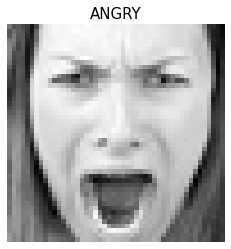

In [186]:
# Viewing random images of 'angry' class.
angry_img = view_random_images(train_dir,'angry')

Image number: ['Training_76379398.jpg']
Image shape : (48, 48)


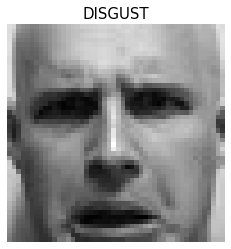

In [187]:
# Viewing random images of 'disgust' class.
disgust_img = view_random_images(train_dir,'disgust')

Image number: ['Training_54639254.jpg']
Image shape : (48, 48)


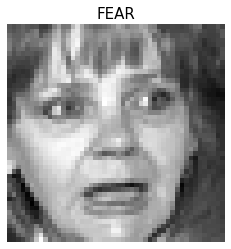

In [188]:
# Viewing random images of 'fear' class.
fear_img = view_random_images(train_dir,'fear')

Image number: ['Training_42839287.jpg']
Image shape : (48, 48)


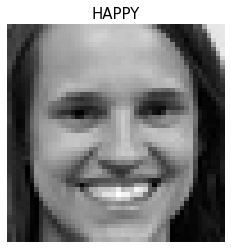

In [189]:
# Viewing random images of 'happy' class.
happy_img = view_random_images(train_dir,'happy')

Image number: ['Training_74807069.jpg']
Image shape : (48, 48)


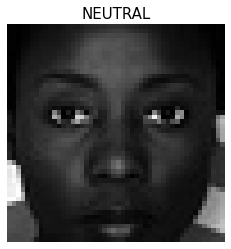

In [190]:
# Viewing random images of 'neutral' class.
neutral_img = view_random_images(train_dir,'neutral')

Image number: ['Training_87115075.jpg']
Image shape : (48, 48)


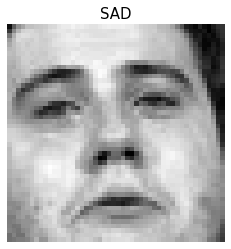

In [191]:
# Viewing random images of 'sad' class.
sad_img = view_random_images(train_dir,'sad')

Image number: ['Training_43829137.jpg']
Image shape : (48, 48)


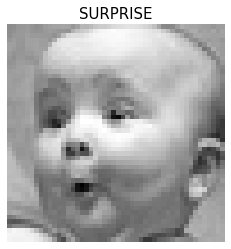

In [192]:
# Viewing random images of 'surprise' class.
surprise_img = view_random_images(train_dir,'surprise')

## **Model Building**

➡️ In this particular step, data will be pre-pocessed and augmented as per requirement followed by model building. The objective here is to try out different models such as CNN and some pre-trained architectures which comes under transfer learning approach. The model with highest accuracy will be taken into consideration and saved in order to use it in creating the web application. Architectures which will be used are as follows:
1. **ResNet50 (Transfer learning)**
2. **CNN (Model_B & Model_C)**

Here, I start with transfer learning using the ResNet50 architecture followed by CNN architecture. So, two CNN model has been created one after the other.

Need to access the GPU in order to train the model faster.

In [193]:
# Checking the GPU.
!nvidia-smi

Wed May 18 15:08:50 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    32W /  70W |   8980MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

So, **Tesla T4** GPU is allocated by google colaboratory.

#### **ResNet50**

"ResNet50" is a convolutional neural network that is 50 layers deep. ResNet, short for Residual Networks is a classic neural network used as a backbone for many computer vision tasks. It is a variant of ResNet model which has 48 Convolution layers along with 1 MaxPool and 1 Average Pool layer.

In [194]:
# Creating a data generator to pre-process and augmenting the data.
train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   shear_range=0.15,
                                   zoom_range=0.15,                          
                                   rescale=1./255)
validation_datagen = ImageDataGenerator(horizontal_flip=True,
                                       rescale=1./255)

In [195]:
# Creating train and test data based on pre-processing performed.
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,                  
                                               target_size = (48, 48), 
                                               shuffle=True,
                                               color_mode='rgb',        
                                               class_mode = 'categorical')

test_data = validation_datagen.flow_from_directory(directory = test_dir,
                                                   batch_size = 32,
                                                   target_size = (48,48),
                                                   shuffle=False,
                                                   color_mode='rgb',
                                                   class_mode = 'categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


◾ Data is scaled and also augmented in terms or zooming and flipping. This training now and testing data can be used in 'ResNet50' model creation.

In [196]:
# Loading the pre-trained 'ResNet50' architecture.
from tensorflow.keras.applications import ResNet50

In [197]:
# Creating and checking the base model summary.
base_model_resnet50 = ResNet50(input_shape=(48,48,3),include_top = False, weights = 'imagenet')
base_model_resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 54, 54, 3)    0           ['input_6[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 24, 24, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 24, 24, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [198]:
# Freezing all the layers in base model except the last 5.
for layer in base_model_resnet50.layers[:-5]:
    layer.trainable = False

In [199]:
# Creating a 'Resnet50' model.
model_A = Sequential([
    
    # ResNet50 layers.
    base_model_resnet50,
    Dropout(0.2),
    BatchNormalization(),

    # Flattening the layer.
    Flatten(),
    
    # 1st fully connected layer.
    Dense(512, activation = 'relu', kernel_initializer = 'he_normal'),
    Dropout(0.25),
    BatchNormalization(),

    # 2nd fully connected layer.
    Dense(256, activation = 'relu', kernel_initializer = 'he_normal'),
    Dropout(0.25),
    BatchNormalization(),

    # Output layer.
    Dense(7, activation = 'softmax')
])

In [200]:
# Compiling the model.
model_A.compile(loss = 'categorical_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

In [201]:
# Checking model summary.
model_A.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 dropout_27 (Dropout)        (None, 2, 2, 2048)        0         
                                                                 
 batch_normalization_27 (Bat  (None, 2, 2, 2048)       8192      
 chNormalization)                                                
                                                                 
 flatten_7 (Flatten)         (None, 8192)              0         
                                                                 
 dense_21 (Dense)            (None, 512)               4194816   
                                                                 
 dropout_28 (Dropout)        (None, 512)               0         
                                                      

In [202]:
# Creating callbacks.
early_stop = EarlyStopping('val_loss',
                           patience=10,
                           restore_best_weights=True,
                           verbose = 1)
reduce_learning_rate = ReduceLROnPlateau('val_loss', 
                                         factor=0.1,
                                         patience=25, 
                                         min_lr=0.00001,
                                         model='auto')

In [203]:
# Fitting the model.
history_model_A = model_A.fit(train_data,
                              epochs = 100,
                              steps_per_epoch = len(train_data),
                              validation_data = test_data,
                              validation_steps = test_data.n // test_data.batch_size,
                              callbacks = [early_stop, reduce_learning_rate])

Epoch 1/100
898/898 [==============================] - 43s 44ms/step - loss: 1.9600 - accuracy: 0.2331 - val_loss: 1.9244 - val_accuracy: 0.2801 - lr: 0.0010
Epoch 2/100
898/898 [==============================] - 38s 43ms/step - loss: 1.7638 - accuracy: 0.2838 - val_loss: 1.9486 - val_accuracy: 0.3062 - lr: 0.0010
Epoch 3/100
898/898 [==============================] - 38s 43ms/step - loss: 1.7303 - accuracy: 0.3006 - val_loss: 1.9070 - val_accuracy: 0.2867 - lr: 0.0010
Epoch 4/100
898/898 [==============================] - 38s 42ms/step - loss: 1.7179 - accuracy: 0.3024 - val_loss: 2.0405 - val_accuracy: 0.2906 - lr: 0.0010
Epoch 5/100
898/898 [==============================] - 38s 43ms/step - loss: 1.7069 - accuracy: 0.3130 - val_loss: 1.8102 - val_accuracy: 0.2991 - lr: 0.0010
Epoch 6/100
898/898 [==============================] - 40s 44ms/step - loss: 1.6966 - accuracy: 0.3219 - val_loss: 1.9413 - val_accuracy: 0.2652 - lr: 0.0010
Epoch 7/100
898/898 [==============================]

In [204]:
# Evaluating on overall test data.
model_A.evaluate(test_data)

225/225 [==============================] - 4s 20ms/step - loss: 1.7315 - accuracy: 0.3143


[1.7314735651016235, 0.31429368257522583]

◾ Accuracy on overall test data is **31.43%**

In [205]:
# Creating a helper function to plot accuracy and loss curves.
def plot_loss_curves(history):
  '''
  Returns separate loss and accuracy curves for training and validation set.
  '''
  
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # PLotting loss.
  plt.plot(epochs, loss, label = 'training_loss',linewidth=3,color='red')
  plt.plot(epochs, val_loss, label = 'val_loss',linewidth=3,color='black')
  plt.title('LOSS CURVE',fontsize = 25)
  plt.legend()
  plt.grid()
  plt.show()

  # Plotting accuracy.
  plt.figure()                                                            
  plt.plot(epochs, accuracy, label = 'training_accuracy',linewidth=3,color='red')
  plt.plot(epochs, val_accuracy, label = 'val_accuracy',linewidth=3,color='black')
  plt.title('ACCURACY',fontsize = 25)
  plt.legend()
  plt.grid()
  plt.show()

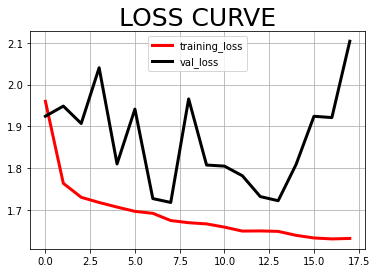

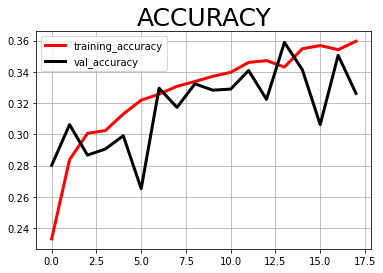

In [206]:
# Plotting the loss & accuracy curve for model.
plot_loss_curves(history_model_A)

◾ "ResNet50" model did not perform well with training accuracy of **35.96%** and validation accuracy of **31.43%**. So, the score says it all that this model cannot be considered good and cannot be used to implement it in real time scenario.

#### **Convolutional Neural Networks (CNN)**

A convolutional neural network (CNN/ConvNet) is a class of deep neural networks, most commonly applied to analyze visual imagery.

**1st CNN model**

In [207]:
# Creating a data generator to pre-process and augmenting the data.
train_datagen_a = ImageDataGenerator(rotation_range = 15,
                                     width_shift_range = 0.15,
                                     height_shift_range = 0.15,
                                     shear_range = 0.15,
                                     zoom_range = 0.15,
                                     horizontal_flip = True,
                                     rescale=1./255)
validation_datagen_a = ImageDataGenerator(horizontal_flip=True,
                                          rescale=1./255)

In [208]:
# Creating train and test data based on pre-processing performed.
train_data_a = train_datagen_a.flow_from_directory(directory = train_dir,
                                               batch_size = 32,                  
                                               target_size = (48, 48), 
                                               shuffle=True,   
                                               color_mode='grayscale',     
                                               class_mode = 'categorical')

test_data_a = validation_datagen_a.flow_from_directory(directory = test_dir,
                                                   batch_size = 32,
                                                   target_size = (48,48),
                                                   shuffle=False,
                                                   color_mode='grayscale',
                                                   class_mode = 'categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [209]:
# Creating a custom CNN model.
model_B = Sequential([
    
    # 1st CNN layer.
    Conv2D(64, (3,3), padding = 'same', input_shape = (48,48,1), activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2,2)),
    Dropout(0.25),

    # 2nd CNN layer.
    Conv2D(128, (5,5), padding = 'same', activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2,2)),
    Dropout(0.25),

    # 3rd CNN layer.
    Conv2D(512, (3,3), padding = 'same', activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2,2)),
    Dropout(0.25),

    # 4th CNN layer.
    Conv2D(512, (3,3), padding = 'same', activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2,2)),
    Dropout(0.25),

    # Flattening the layer.
    Flatten(),

    # 1st fully connected layer.
    Dense(256, activation = 'relu'),
    BatchNormalization(),
    Dropout(0.25),

    # 2nd fully connected layer.
    Dense(512, activation = 'relu'),
    BatchNormalization(),
    Dropout(0.25),

    # Output layer.
    Dense(7, activation = 'softmax')                                # Number of classes = 7.
])

In [210]:
# Compiling the model.
model_B.compile(loss = 'categorical_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

# Using the Adam optimizer with default learning rate that is 0.001

In [211]:
# Checking model summary.
model_B.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_30 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_30 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 128)       204928    
                                                                 
 batch_normalization_31 (Bat  (None, 24, 24, 128)     

In [212]:
# Creating callbacks.
early_stop = EarlyStopping('val_loss',
                           patience=10,
                           restore_best_weights=True,
                           verbose = 1)
reduce_learning_rate = ReduceLROnPlateau('val_loss', 
                                         factor=0.1,
                                         patience=25, 
                                         min_lr=0.00001,
                                         model='auto')

In [213]:
# Fitting the model.
history_model_B = model_B.fit(train_data_a,
                              epochs = 100,
                              steps_per_epoch = len(train_data_a),
                              validation_data = test_data_a,
                              validation_steps = test_data_a.n // test_data_a.batch_size,
                              callbacks = [early_stop,reduce_learning_rate])

Epoch 1/100
898/898 [==============================] - 29s 31ms/step - loss: 2.0293 - accuracy: 0.2247 - val_loss: 1.8087 - val_accuracy: 0.2586 - lr: 0.0010
Epoch 2/100
898/898 [==============================] - 28s 31ms/step - loss: 1.7759 - accuracy: 0.2873 - val_loss: 1.9071 - val_accuracy: 0.3016 - lr: 0.0010
Epoch 3/100
898/898 [==============================] - 28s 31ms/step - loss: 1.5767 - accuracy: 0.3842 - val_loss: 1.9035 - val_accuracy: 0.3450 - lr: 0.0010
Epoch 4/100
898/898 [==============================] - 28s 31ms/step - loss: 1.4496 - accuracy: 0.4418 - val_loss: 1.3042 - val_accuracy: 0.5052 - lr: 0.0010
Epoch 5/100
898/898 [==============================] - 27s 30ms/step - loss: 1.3822 - accuracy: 0.4704 - val_loss: 1.3031 - val_accuracy: 0.4865 - lr: 0.0010
Epoch 6/100
898/898 [==============================] - 27s 30ms/step - loss: 1.3373 - accuracy: 0.4860 - val_loss: 1.1740 - val_accuracy: 0.5462 - lr: 0.0010
Epoch 7/100
898/898 [==============================]

In [214]:
# Evaluating on overall test data.
model_B.evaluate(test_data_a)

225/225 [==============================] - 3s 12ms/step - loss: 0.9385 - accuracy: 0.6509


[0.9384984374046326, 0.6508776545524597]

◾ Overall accuracy of test data of this particular model is **65.09%**

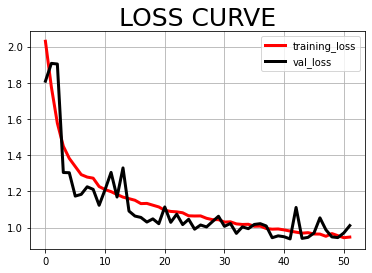

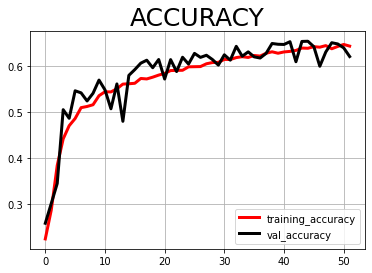

In [215]:
# Plotting the loss and accuracy curves.
plot_loss_curves(history_model_B)

◾ This CNN model performed better than average and looks promising and can be considered to use it in real case scenario with training accuracy of **64.32%** and validation accuracy of **65.09%**.

*Lets, check out another CNN model in order to check if small tweaking can help in increasing the accuracy.*

**2nd CNN model**

In [216]:
# Creating 2nd CNN model.
model_C = Sequential([
    
    # 1st CNN layer.
    Conv2D(64, (3,3), padding = 'same', input_shape = (48,48,1), activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2,2)),
    Dropout(0.25),

    # 2nd CNN layer.
    Conv2D(128, (5,5), padding = 'same', activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2,2)),
    Dropout(0.25),

    # 3rd CNN layer.
    Conv2D(512, (3,3), padding = 'same', activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2,2)),
    Dropout(0.25),

    # 4th CNN layer.
    Conv2D(512, (3,3), padding = 'same', activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2,2)),
    Dropout(0.25),

    # Flattening the layer.
    Flatten(),

    # 1st fully connected layer.
    Dense(256, activation = 'relu'),
    BatchNormalization(),
    Dropout(0.25),

    # 2nd fully connected layer.
    Dense(512, activation = 'relu'),
    BatchNormalization(),
    Dropout(0.25),

    # Output layer.
    Dense(7, activation = 'softmax')                                # Number of classes = 7.
])

In [217]:
# Compiling the model.
model_C.compile(loss = 'categorical_crossentropy',
                optimizer = Adam(learning_rate = 0.0001),
                metrics = ['accuracy'])

# Used 0.0001 as learning rate instead of default learning rate(0.001).

In [218]:
# Checking the model summary.
model_C.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_36 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_36 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 128)       204928    
                                                                 
 batch_normalization_37 (Bat  (None, 24, 24, 128)     

◾ This model is exactly the same as previous model but the only difference is change in learning rate just to see if it manages to increase the model accuracy.

In [219]:
# Fitting the model.
history_model_C = model_C.fit(train_data_a,
                              epochs = 100,
                              steps_per_epoch = len(train_data_a),
                              validation_data = test_data_a,
                              validation_steps = test_data_a.n // test_data_a.batch_size,
                              callbacks = [early_stop,reduce_learning_rate])

Epoch 1/100
898/898 [==============================] - 30s 32ms/step - loss: 2.3297 - accuracy: 0.1907 - val_loss: 1.9280 - val_accuracy: 0.2556 - lr: 1.0000e-04
Epoch 2/100
898/898 [==============================] - 28s 31ms/step - loss: 2.0623 - accuracy: 0.2221 - val_loss: 1.7679 - val_accuracy: 0.2785 - lr: 1.0000e-04
Epoch 3/100
898/898 [==============================] - 28s 31ms/step - loss: 1.9662 - accuracy: 0.2429 - val_loss: 1.7482 - val_accuracy: 0.2966 - lr: 1.0000e-04
Epoch 4/100
898/898 [==============================] - 28s 31ms/step - loss: 1.9071 - accuracy: 0.2612 - val_loss: 1.7266 - val_accuracy: 0.3248 - lr: 1.0000e-04
Epoch 5/100
898/898 [==============================] - 28s 31ms/step - loss: 1.8286 - accuracy: 0.2869 - val_loss: 1.6893 - val_accuracy: 0.3456 - lr: 1.0000e-04
Epoch 6/100
898/898 [==============================] - 28s 31ms/step - loss: 1.7405 - accuracy: 0.3251 - val_loss: 1.5729 - val_accuracy: 0.3948 - lr: 1.0000e-04
Epoch 7/100
898/898 [=======

In [220]:
# Evaluating on overall test data.
model_C.evaluate(test_data_a)

225/225 [==============================] - 3s 11ms/step - loss: 0.9578 - accuracy: 0.6461


[0.9578379392623901, 0.646140992641449]

◾ Overall accuracy of test data of this particular model is **64.61%**

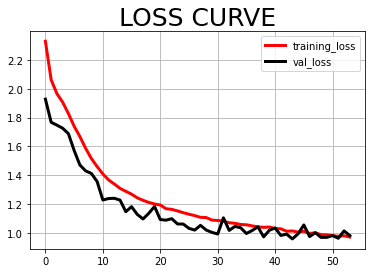

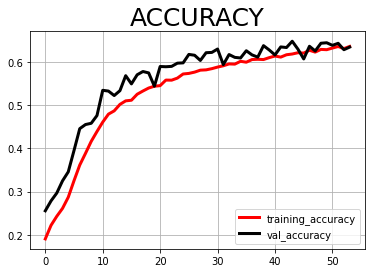

In [221]:
# Plotting the loss and accuracy curves.
plot_loss_curves(history_model_C)

◾ The model got a training accuracy of **63.52%** and validation accuracy of **64.61%**. The model performed better than average but the could not manage to get higher accuracy than the previous CNN model (model_B).

## **Saving Model**

➡️ The model with highest accuracy score among all the other models will be saved for further use such as evaluation and face emotion application building.

In [250]:
# Saving the model using the "HDF5" format.
model_B.save("Custom_CNN_model.h5")

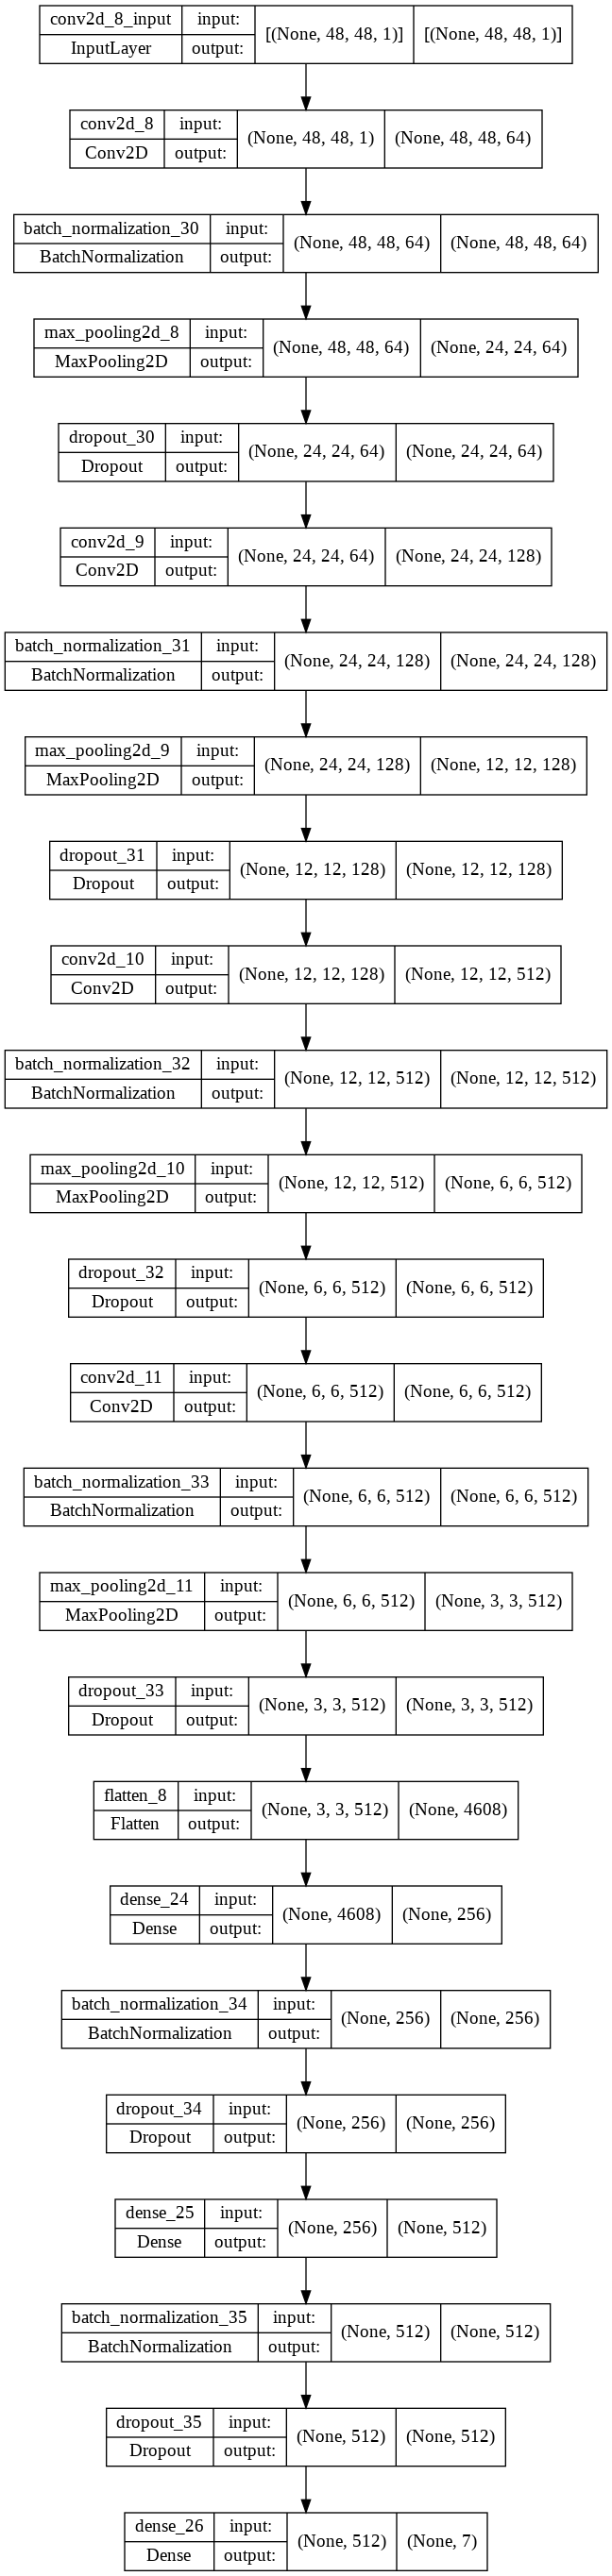

In [251]:
# Visualizing the saved model.
plot_model(model_B, show_shapes=True, show_layer_names=True, expand_nested=True)

◾ Second CNN model(model_B) performed the best out of all. So, saved the model for further evaluation and application building.

## **Model Evaluation**

➡️ The model which performed the best will be evaluated to check how it actually performs prediction.

In [252]:
# Predictions of test data.
predictions = model_B.predict(test_data_a)

# Printing confusion matrix.
cm = confusion_matrix(y_pred = np.argmax(predictions, axis=-1), y_true = test_data_a.classes)                         
cm

array([[ 565,    4,   49,   34,  139,  132,   35],
       [  42,   43,    6,    3,    8,    6,    3],
       [ 145,    2,  397,   19,  136,  218,  107],
       [  45,    0,   35, 1480,  141,   31,   42],
       [  49,    0,   45,   48,  880,  182,   29],
       [ 128,    0,  104,   51,  278,  649,   37],
       [  23,    0,   76,   37,   29,   10,  656]])

In [253]:
# Computing predictions.
predictions = model_B.predict_generator(generator = test_data_a)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = test_data_a.classes
class_names = test_data_a.class_indices.keys()

In [254]:
# Creating a function to create plot modified confusion matrix.
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap = plt.cm.Oranges):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

<Figure size 432x288 with 0 Axes>

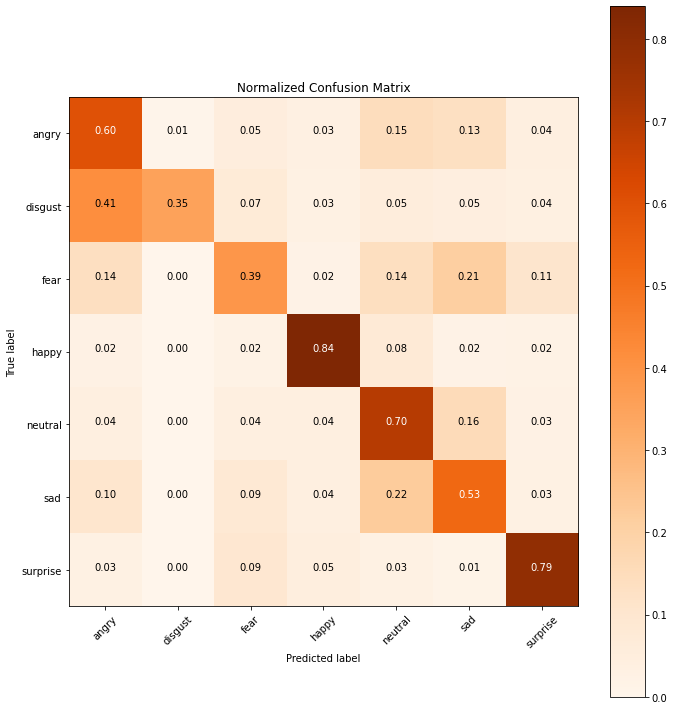

In [255]:
# Computing confusion matrix.
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision = 2)

# Plotting normalized confusion matrix.
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = class_names, title= 'Normalized Confusion Matrix')
plt.show()

◾ The model performs very good on predicting the happy & surprise faces whereas could not perform upto the mark while predicting fear & disgust faces.

In [256]:
# Downloading the model from Google colab.
from google.colab import files
files.download('/content/Custom_CNN_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

◾ Downloaded the model to use it in creating the web application.

## **Conclusion**

* **Three models are trained in this notebook which are model_A, model_B, model_C.**

* **Tesla T4 is the GPU allocated by google colab which helped in making the training process faster.**

* **First model (model_A) is trained using 'ResNet50' architecture which failed to get good accuracy which is 35.96% & 31.43% as training and validation accuracy respectively.**

* **Second model (model_B) is trained using CNN architecture which gave a quite impressive result with an accuracy of 64.32% & 65.09% as training and validation accuracy respectively.**

* **Third model (model_C) is exactly the same as second model but the only difference is its trained using 0.0001 learning rate instead of default learning rate (0.001). This model also managed to perform well with an accuracy of 63.52% & 64.61% as training and validation accuracy respectively.**

* **Out of all, the second model (model_B) performed the best with highest accuracy among all the other models and is saved and downloaded for face emotion detection application bnuilding.**

* **Best performing model predicts the happy and surprised emotions quite good but struggles to predict the fear and disgust emotions.**